## CSCI 365/765 HW 2

### Instructor: Alex Pang, Spring 2021
### Student Name:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from math import log, exp, sqrt, pow

### Option Calculator

### In this homework, we will implement an option class and its corresponding calculation pricer class

In [2]:
#from CF_HW_2_first_last import *
from CF_HW_2_chang_liu import *

In [3]:
# example
pricing_date = date(2021, 1, 1)
risk_free_rate = 0.04
pricer = OptionPricer(pricing_date, risk_free_rate)

### Question 1 (Problem 13.5 of the textbook modified)

### A stock price is currently 100. Over each of the next two six-month periods it is expected to go up by 10% (i.e. by a multiple factor of u = 1.1) or down by a multiple factor of d where d = 1/u. The risk-free interest rate is 8% per annum with continuous compounding. What is the value of a one-year European call option with a strike price of 100 using Binomial Model? 

**Type your code below**

In [4]:
T = 1.0
num_of_period = 2
dt = T / num_of_period
r = 0.08
u = 1.1
d = 1/u
sigma = log(u)/sqrt(dt)
S = 100
K = 100
# mu and symbol does not matter, just assume 10%
mu = 0.1
symbol = 'problem13.5'
pricer = OptionPricer(pricing_date, r)
stock = Stock(symbol,S,sigma,mu)
option = Option(Option.Type.CALL,Option.Style.EUROPEAN,stock,T,K)
call = EuropeanCallOption(stock,T,K)
call_price = pricer.calc_binomial_model_price(call,num_of_period)
print('Call price is',call_price)


Call price is 9.228371548345102


### Question 2. Using the same assumption from Question 1. Calculate the European Put option with the same strike and expiry using Binomial Tree. Calculate also implied put price from the call price using Put-Call parity and the implied call price from the put price. Does Put-Call Parity hold for Binomial trees?

**Type your code and answer below**

In [5]:
option1 = Option(Option.Type.PUT,Option.Style.EUROPEAN,stock,T,K)
put = EuropeanPutOption(stock,T,K)
put_price = pricer.calc_binomial_model_price(put,num_of_period)
print('Put price with the same strike and expiry is ',put_price)

corresponding_option_price1 = pricer.calc_parity_price(call, call_price)
print("corresponding call price is {} when put price is {}".format(corresponding_option_price1,put_price))

corresponding_option_price2 = pricer.calc_parity_price(put, put_price)
print("corresponding put  price is {} when call price is {}:".format(corresponding_option_price2,call_price))

print("Above results imply that Put-Call Parity holds for Binomial trees ")
# c=9.6104+100*exp(-0.08)
# p=1.9203+100
# c=call_price+100*exp(-0.08)
# p=put_price+100
# print(c)
# print(p)

Put price with the same strike and expiry is  1.5400061870086883
corresponding call price is 1.5400061870086859 when put price is 1.5400061870086883
corresponding put  price is 9.228371548345109 when call price is 9.228371548345102:
Above results imply that Put-Call Parity holds for Binomial trees 


### Question 3  (Problem 13.17 of the textbook) 

### A stock index is currently 1,500. Its volatility is 18%. The risk-free rate is 4% per annum (continuously compounded) for all maturities and the dividend yield on the index is 2.5%. What is the value a 12-month American put option with a strike price of 1,480 given by a two-step binomial tree.

**Type your answer below**

In [6]:
stock_price3=1500
sigma3=0.18
r3=0.04
q3=0.025
K3=1480
T3=1
num_of_period3 = 2
dt3 = T3 / num_of_period3
symbol3 = 'problem13.17'
pricer3 = OptionPricer(pricing_date, r3)
stock3 = Stock(symbol3,stock_price3,sigma3,mu,q3)
option3 = Option(Option.Type.PUT,Option.Style.AMERICAN,stock3,T3,K3)
put3 = AmericanPutOption(stock3,T3,K3)
put_price3 = pricer3.calc_binomial_model_price(put3,num_of_period3)
print("put option is",put_price3)

put option is 78.4137177695263


### Question 4 (Problem 13.18 of the textbook)

### The futures price of a commodity is 90.  Use a three-step Binomial tree to value (a) a nine-month American call option with strike price \$93 and (b) a nine-month American put option with strike price 93. The volatility is 28% and the risk-free rate (all maturities) is 3% with continuous compounding

**Type your code below**

In [7]:
commodity_price4=90
sigma4=0.28
r4=0.03
call_K4=93
put_K4=93
T4=9/12
num_of_period4 = 3
dt4 = T4 / num_of_period4
symbol4 = 'prob13.18'

pricer4 = OptionPricer(pricing_date, r4)
stock4 = Stock(symbol4,commodity_price4,sigma4,mu)
option4 = Option(Option.Type.CALL,Option.Style.AMERICAN,stock4,T4,call_K4)
call4 = AmericanCallOption(stock4,T4,call_K4)
call_price4 = pricer4.calc_binomial_model_price(call4,num_of_period4)
print("(a) call price is", call_price4)
option4_1 = Option(Option.Type.PUT,Option.Style.AMERICAN,stock4,T4,put_K4)
put4 = AmericanPutOption(stock4,T4,put_K4)
put_price4 = pricer4.calc_binomial_model_price(put4,num_of_period4)
print("(b) put  price is", put_price4)


(a) call price is 8.911449522816081
(b) put  price is 10.019071364502532


### Question 5 (Problem 15.4 of the textbook)

### Calculate the price of a three-month European put option on a non-dividend-paying stock with a strike price of 50 when the current stock price is 50, the risk-free interest rate is 10% per annum, and the volatility is 30% per annum using Black-Scholes Model. 

In [8]:
stock_price5=50
sigma5=0.3
r5=0.1
K5=50
T5=3/12
symbol5 = 'prob15.4'
stock5 = Stock(symbol5,stock_price5,sigma5,mu)
option5 = Option(Option.Type.PUT,Option.Style.EUROPEAN,stock5,T5,K5)
pricer5 = OptionPricer(pricing_date, r5)
# put5 = EuropeanPutOption(stock5,T5,K5)
put_price5 = pricer5.calc_black_scholes_price(option5)
print("put price is",put_price5)


put price is 2.3759406675006467


### Question 6. Calculate the same call and put from Question 4, but assume European style and use Black-Scholes Model. Calculate also the European Call using the same assumptions as the put in Q5

In [9]:
# Q4
symbol6 = 'prob6'
commodity_price6_1=90
sigma6_1=0.28
r6_1=0.03
call_K6_1=93
put_K6_1=93
T6_1=9/12
num_of_period6_1 = 3
dt6_1 = T6_1 / num_of_period6_1
stock6_1 = Stock(symbol6,commodity_price6_1,sigma6_1,mu)
option6_1 = Option(Option.Type.CALL,Option.Style.EUROPEAN,stock6_1,T6_1,call_K6_1)
option6_2 = Option(Option.Type.PUT,Option.Style.EUROPEAN,stock6_1,T6_1,put_K6_1)
pricer6_1 = OptionPricer(pricing_date, r6_1)
call_price6_1 = pricer6_1.calc_black_scholes_price(option6_1)
put_price6_1 =  pricer6_1.calc_black_scholes_price(option6_2)
print('By using Black-Scholes Model，call price in Q4 is {}, put price in Q4 is {}'.format(call_price6_1,put_price6_1))

# Q5
stock_price6_3=50
sigma6_3=0.3
r6_3=0.1
K6_3=50
T6_3=3/12
stock6_3 = Stock(symbol6,stock_price6_3,sigma6_3,mu)
option6_3 = Option(Option.Type.CALL,Option.Style.EUROPEAN,stock6_3,T6_3,K6_3)
pricer6_3 = OptionPricer(pricing_date, r6_3)
# put5 = EuropeanPutOption(stock5,T5,K5)
call_price6_3 = pricer6_3.calc_black_scholes_price(option6_3)
print("call price in Q5 by using Black-Scholes Model is",call_price6_3)

By using Black-Scholes Model，call price in Q4 is 8.27247167207019, put price in Q4 is 9.20333673105047
call price in Q5 by using Black-Scholes Model is 3.610445066084015


### Question 7 (Problem 19.3 of the textbook)

### Calculate the delta of an at-the-money six-month European call option on a non-dividend-paying stock when the risk-free interest rate is 10% per annum with the spot price being 100 and the stock price volatility is 25% per annum.¶

In [10]:
r7=0.1
sigma7=0.25
# the stock price does not matter,because in formula,log(S0/K),S0 and K will cancel each other
#  d1 = (log(S0/K)+(r-q+pow(sigma,2)/2)*T)/(sigma * sqrt(T))
stock_price7 = 100
K7 = stock_price7
T7 = 6/12
symbol7 = 'Problem 19.3'
stock7 = Stock(symbol6,stock_price7,sigma7,mu)
option7 = Option(Option.Type.CALL,Option.Style.EUROPEAN,stock7,T7,K7)
pricer7 = OptionPricer(pricing_date, r7)
delta = pricer7.calc_delta(option7)
print("Delta is",delta)

Delta is 0.6447672796293542


### Question 8. Calculate the gamma, theta, vega and rho of the same European call option in Question 7

In [11]:
gamma = pricer7.calc_gamma(option7)
theta = pricer7.calc_theta(option7)
vega = pricer7.calc_vega(option7)
rho = pricer7.calc_rho(option7)
print('Gamma is {}, Theta is {}'.format(gamma,theta))
print('Vega is {}, Rho is {}'.format(vega,rho))

Gamma is 0.021064902379923867, Theta is -12.072231283969437
Vega is 26.331127974904835, Rho is 27.44724645121614


### Question 9: (Optional for undergraduate) Plot the graph of Delta, Gamma, Theta, Vega and Rho for the Call Option described in Question 7

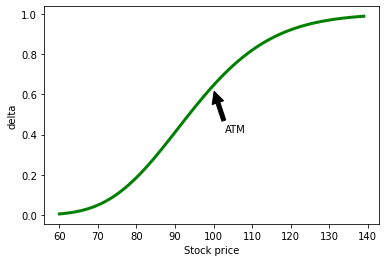

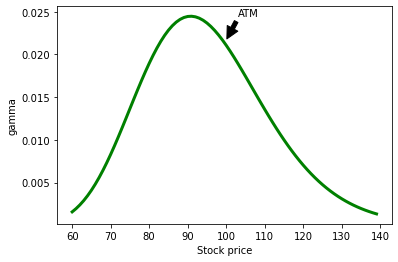

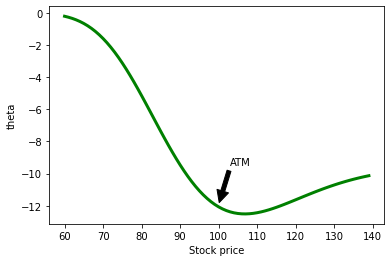

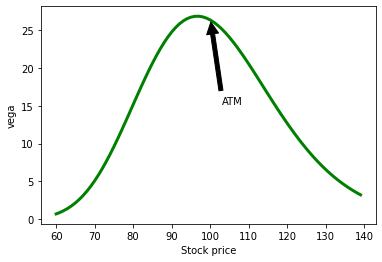

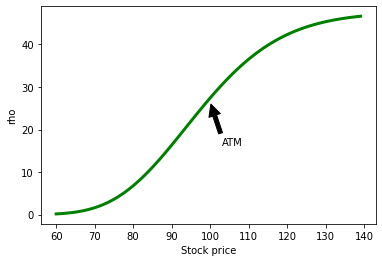

In [12]:
# Create a list in a range of 0-100
Stock_price_x_9 =[s for s in range(60,140)]
# print(Stock_price_x_9)
stock_list9 = []
option_list9= []
pricer_list9 = []
delta_y_list9 = []
gamma_y_list9 = []
theta_y_list9 = []
vega_y_list9 = []
rho_y_list9 = []
for i in Stock_price_x_9:
    stock9 = Stock(symbol6,i,sigma7,mu)
    stock_list9.append(stock9)
    option9 = Option(Option.Type.CALL,Option.Style.EUROPEAN,stock9,T7,K7)
    option_list9.append(option9) 
    pricer9 = OptionPricer(pricing_date, r7)
    pricer_list9.append(pricer9) 
    delta_y_list9.append(pricer9.calc_delta(option9)) 
    gamma_y_list9.append(pricer9.calc_gamma(option9)) 
    theta_y_list9.append(pricer9.calc_theta(option9)) 
    vega_y_list9.append(pricer9.calc_vega(option9)) 
    rho_y_list9.append(pricer9.calc_rho(option9))
plt.plot(Stock_price_x_9,delta_y_list9,color='green',linewidth = 3)
plt.xlabel("Stock price")
plt.ylabel("delta")
plt.annotate('ATM', xy=(100, delta_y_list9[100-60-1]), xytext=(103, delta_y_list9[100-70]),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

plt.plot(Stock_price_x_9,gamma_y_list9,color='green',linewidth = 3)
plt.xlabel("Stock price")
plt.ylabel("gamma")
plt.annotate('ATM', xy=(100, gamma_y_list9[100-60-1]), xytext=(103, gamma_y_list9[100-70]),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

plt.plot(Stock_price_x_9,theta_y_list9,color='green',linewidth = 3)
plt.xlabel("Stock price")
plt.ylabel("theta")
plt.annotate('ATM', xy=(100, theta_y_list9[100-60-1]), xytext=(103, theta_y_list9[100-70]),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

plt.plot(Stock_price_x_9,vega_y_list9,color='green',linewidth = 3)
plt.xlabel("Stock price")
plt.ylabel("vega")
plt.annotate('ATM', xy=(100, vega_y_list9[100-60-1]), xytext=(103, vega_y_list9[100-80]),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

plt.plot(Stock_price_x_9,rho_y_list9,color='green',linewidth = 3)
plt.xlabel("Stock price")
plt.ylabel("rho")
plt.annotate('ATM', xy=(100, rho_y_list9[100-60-1]), xytext=(103, rho_y_list9[100-70]),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()